# Задание 1. Методы понижения размерности

Примените методы понижения размерности: PCA, t-SNE и UMAP к изображениям клеток крови из датасета BloodMNIST. Отобразите проекцию данных на двумерное пространство, так как это допускает наиболее простую визуализацию полученного результата (воспользуйтесь [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)).  Какой метод позволяет лучше разделить данные в пространстве? Опишите ваши наблюдения.

Установка и импорт необходимых библиотек:

In [ ]:
!pip install -q umap-learn
!pip install -q --upgrade scikit-image
!pip install -q --upgrade git+https://github.com/MedMNIST/MedMNIST.git

  Preparing metadata (setup.py) ... done


In [ ]:
import umap
import medmnist
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from medmnist import INFO
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [ ]:
data_flag = "bloodmnist"
download = True

info = INFO[data_flag]
task = info["task"]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

# load the data
bloodmnist = DataClass(split="train", download=download)
print(bloodmnist)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×2

Доступ к данным идет посредством обращения к ключу `bloodmnist.imgs`, доступ к разметке классов — через `bloodmnist.labels`

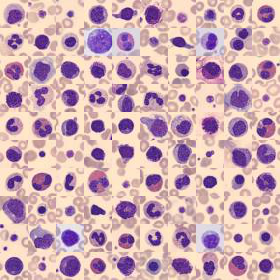

In [ ]:
x = bloodmnist.imgs / 255.0
x = x.reshape(-1, 2352)
y = pd.Series(bloodmnist.labels.reshape(-1))
y = y.astype("int").map(dict(zip(range(0, 8), info["label"].values())))


bloodmnist.montage(length=10)

In [ ]:
bloodmnist.labels

In [ ]:
bloodmnist.labels.reshape(-1)

In [ ]:
pd.Series(bloodmnist.labels.reshape(-1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## PCA

In [ ]:
## Your code here

In [ ]:
# First, we import the StandardScaler module.
from sklearn.preprocessing import StandardScaler

# Next, we create a StandardScaler object called scaler by calling the
# StandardScaler() function.
scaler = StandardScaler()

#  We then fit the scaling model to our training data.
x = scaler.fit_transform(x)

# performing PCA with default number of principal components.
pca = PCA(n_components=2)
pca.fit(x)  # fitting our PCA model with the training data.

PCA(n_components=2)

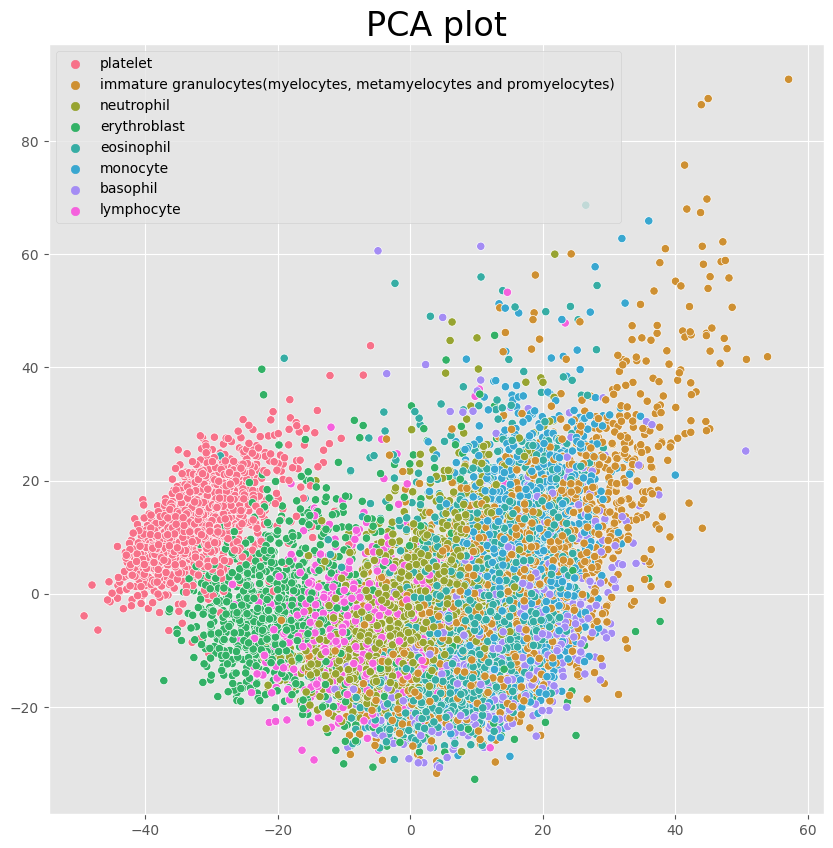

In [ ]:
x_reduced = pca.transform(x)

# Display a scatterplot of the transformed dataset
plt.figure(figsize=(10, 10))
plt.title("PCA plot", size=24)
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=y);

In [ ]:
x_reduced

In [ ]:
x_reduced[:, 1]

## t-SNE

In [ ]:
# Your code here

In [ ]:
x.shape

(11959, 2352)

In [ ]:
x_reduced = PCA(n_components=9).fit_transform(x)
x_reduced.shape

(11959, 9)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 11959 samples in 0.004s...
[t-SNE] Computed neighbors for 11959 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11959
[t-SNE] Computed conditional probabilities for sample 2000 / 11959
[t-SNE] Computed conditional probabilities for sample 3000 / 11959
[t-SNE] Computed conditional probabilities for sample 4000 / 11959
[t-SNE] Computed conditional probabilities for sample 5000 / 11959
[t-SNE] Computed conditional probabilities for sample 6000 / 11959
[t-SNE] Computed conditional probabilities for sample 7000 / 11959
[t-SNE] Computed conditional probabilities for sample 8000 / 11959
[t-SNE] Computed conditional probabilities for sample 9000 / 11959
[t-SNE] Computed conditional probabilities for sample 10000 / 11959
[t-SNE] Computed conditional probabilities for sample 11000 / 11959
[t-SNE] Computed conditional probabilities for sample 11959 / 11959
[t-SNE] Mean sigma: 0.619975
[t-SNE] Computed cond

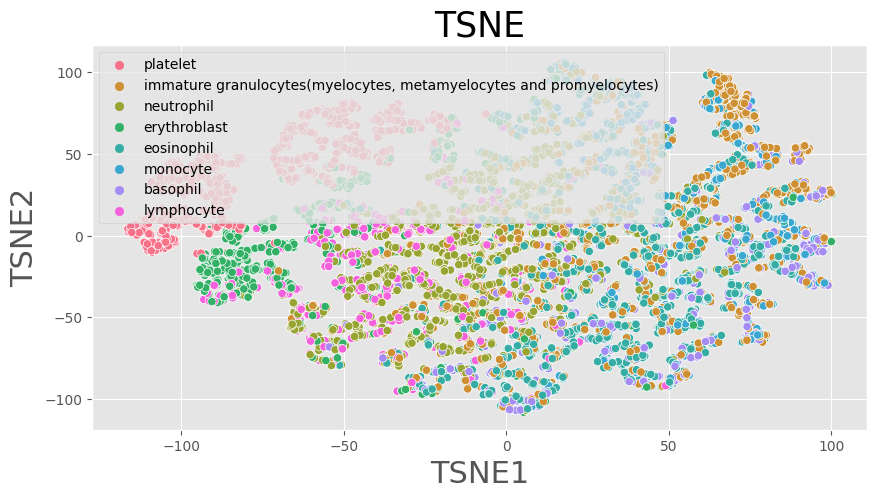

In [ ]:
# 1. Firstly we reduce the dimensionality of the data to 6 features using PCA.
# 2. Then we take the first two PCA components and use this
#    as an initial approximation for the T-SNE algorithm.
# 3. Then we fit T-SNE on the data and plot the first two dimensions
#    of the T-SNE output, which are represented in green.
# 4. The visualization makes clear that there are distinct clusters in our data

model = manifold.TSNE(
    n_components=2,
    init=x_reduced[:, 0:2],  # often use as a reasonable approximation
    perplexity=20,  # important parameter
    verbose=2,
    learning_rate="auto",
)

manifold = model.fit_transform(x_reduced)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=manifold[:, 0], y=manifold[:, 1], hue=y)
plt.title("TSNE", fontsize=25)
plt.xlabel("TSNE1", fontsize=22)
plt.ylabel("TSNE2", fontsize=22)
plt.show()

## UMAP

In [ ]:
# Your code here

In [ ]:
from IPython.display import clear_output

!pip install -q umap-learn
!pip install -q --upgrade tbb
clear_output()

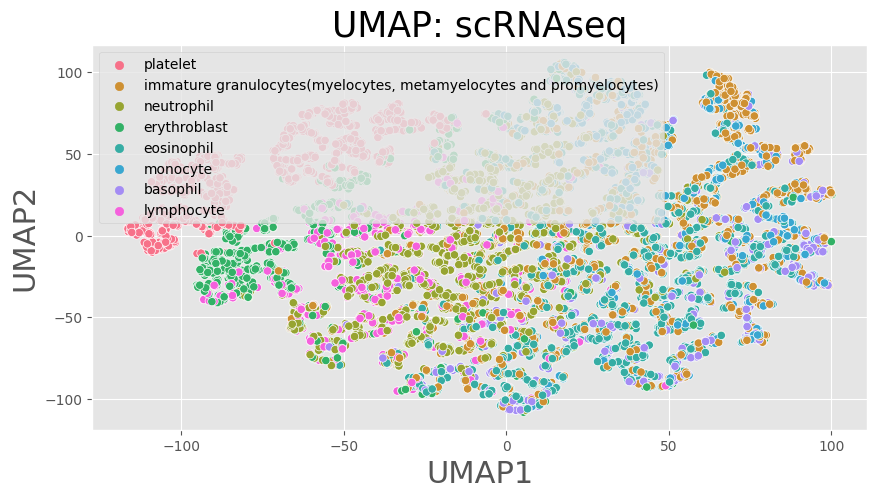

In [ ]:
from umap import UMAP

# Converts the original expression matrix (scRNAseq) into a 9-dimensional PCA space
x_reduced = PCA(n_components=9).fit_transform(x)  # x_scRNAseq

# Initializes UMAP with the PCA components
model = UMAP(
    n_components=2,
    min_dist=1,
    n_neighbors=93,
    init=x_reduced[:, 0:2],
    # it is recommended to use the first two components of PCA for initialization of UMAP and t-SNE
    n_epochs=1000,
    verbose=2,
)

# Runs the UMAP algorithm on the PCA transformed data
umap = model.fit_transform(x_reduced)
clear_output()
# Plots the results of the UMAP transformation
plt.figure(figsize=(10, 5))
sns.scatterplot(x=manifold[:, 0], y=manifold[:, 1], hue=y)
plt.title("UMAP: scRNAseq", fontsize=25)
plt.xlabel("UMAP1", fontsize=22)
plt.ylabel("UMAP2", fontsize=22)
plt.show()

Выводы:

*Сложно сказать, какой метод лучше позволяет разделить данные. Мне кажется, что PCA*

## Формат результата

Пример графика для одного из пунктов задания:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX04/result_1_task_ex04.png" width="300">

# Задание 2. Использование понижения размерности для ускорения обучения

Рассмотрите набор данных TissueMNIST. В этом задании вам нужно сравнить производительность двух моделей: обученной с использованием всех доступных признаков и обученной на данных пониженной размерности. От вас требуется:

1. Построить модель `RandomForestClassifier()` и обучить ее на тренировочной выборке, оценить `accuracy` модели на тестовой выборке и время, потраченное на обучение.
2. Построить модель PCA на тренировочных данных и определить число главных компонент, объясняющих 90% дисперсии (или используйте любой другой способ выбора оптимального числа главных компонент, разбиравшийся на лекции).
3. Преобразовать данные тестовой выборки на главные компоненты полученной модели PCA.
4. Построить модель `RandomForestClassifier()` и обучить ее на данных пониженной размерности, оценить `accuracy` модели на тестовой выборке и время, потраченное на обучение.
5. Описать ваши наблюдения, сделать выводы.

Установка и импорт необходимых библиотек:

In [ ]:
!pip install -q --upgrade git+https://github.com/MedMNIST/MedMNIST.git
!pip install -q --upgrade scikit-image

  Preparing metadata (setup.py) ... done


In [ ]:
import time
import medmnist
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from medmnist import INFO
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [ ]:
data_flag = "tissuemnist"
download = True

info = INFO[data_flag]
task = info["task"]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

# load the data
tissuemnist = DataClass(split="test", download=download)
print(tissuemnist)

Using downloaded and verified file: /root/.medmnist/tissuemnist.npz
Dataset TissueMNIST (tissuemnist)
    Number of datapoints: 47280
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'Collecting Duct, Connecting Tubule', '1': 'Distal Convoluted Tubule', '2': 'Glomerular endothelial cells', '3': 'Interstitial endothelial cells', '4': 'Leukocytes', '5': 'Podocytes', '6': 'Proximal Tubule Segments', '7': 'Thick Ascending Limb'}
    Number of samples: {'train': 165466, 'val': 23640, 'test': 47280}
    Description: We use the BBBC051, available from the Broad Bioimage Benchmark Collection. The dataset contains 236,386 human kidney cortex cells, segmented from 3 reference tissue specimens and organized into 8 categories. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. Each gray-scale image is 32×32×7 pixels, where 7 denotes 7 slices. We take maximum values across the slice

In [ ]:
x = tissuemnist.imgs / 255.0
x = x.reshape(-1, 784)
y = tissuemnist.labels

tissuemnist.montage(length=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
scaler = StandardScaler()

#  We then fit the scaling model to our training data.
x_train = scaler.fit_transform(x_train)

# We transform your test set by applying the same scaling model.
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

In [ ]:
y_train.reshape(-1)

In [ ]:
rng = np.random.RandomState(42)
rf = RandomForestClassifier(n_estimators=200, random_state=rng)
start_time = time.time()
rf.fit(x_train, y_train.reshape(-1))
print("--- %s seconds ---" % (time.time() - start_time))

# Your code here

--- 141.80235648155212 seconds ---


In [ ]:
y_pred = rf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy до понижения размерности: {acc:.4f}')

Accuracy до понижения размерности: 0.5195


58 components to 90% explained_variance_ratio


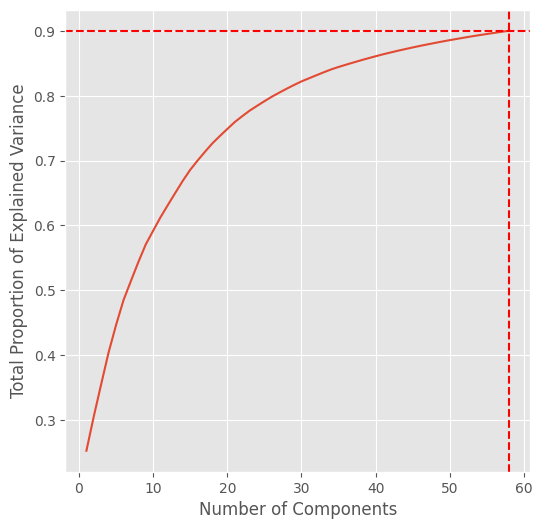

In [ ]:
# Your code here
pca = PCA(0.90)
pca.fit(x_train)

total_explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 6))

plt.plot(np.arange(1, len(total_explained) + 1), total_explained)
plt.axhline(y=0.90, color="red", linestyle="--")
chosen_number = np.argmax(total_explained >= 0.90) + 1
plt.axvline(x=chosen_number, color="red", linestyle="--")
plt.ylabel("Total Proportion of Explained Variance")
plt.xlabel("Number of Components")
print(f"{chosen_number} components to 90% explained_variance_ratio")
plt.show()

In [ ]:
pca1 = PCA(n_components=58)
pca.fit(x_train)
x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)

In [ ]:
x_train_reduced.shape

In [ ]:
rng = np.random.RandomState(42)
rf = RandomForestClassifier(n_estimators=200, random_state=rng)
start_time = time.time()
rf.fit(x_train_reduced, y_train.reshape(-1))
print("--- %s seconds ---" % (time.time() - start_time))

--- 77.00636720657349 seconds ---


In [ ]:
y_pred = rf.predict(x_test_reduced)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy после понижения размерности: {acc:.4f}')

Accuracy после понижения размерности: 0.4938


_Вывод:_

_Понижение размерности данных приводит к ускорению обучения (примерно в 1.8 раз) и небольшому снижению точности._


## Формат результата

Получить значения точности (`accuracy`) и времени обучения `RandomForestClassifier()` на обычных данных и данных с пониженной размерностью.

# Задание 3. Отбор признаков

У нас есть датасет из 30 признаков. Известно, что для улучшения качества предсказания достаточно использовать 5 признаков, но неизвестно, какие.

Отберите 5 признаков, используя методы отбора признаков, и увеличьте качество предсказания.

## Формат результата

* Accuracy модели > 0.62.


Установка и импорт необходимых библиотек:

In [ ]:
!pip install -q catboost phik boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

matplotlib.style.use("ggplot")

Произведем загрузку данных

In [ ]:
df = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/feature_select_ex.csv"
)
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,target
0,1.200866,1.809315,-1.493981,0.478672,-2.897162,0.374540,0.950714,0.731994,0.598658,0.156019,...,0.360723,-0.171863,135,0.118425,0.252259,5.147098,3,10,2,1
1,3.667649,-0.198241,-2.050940,2.648047,0.509638,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.284437,1.253283,1,1.716076,0.911066,3.195801,1,100,0,1
2,0.474824,-1.747566,0.011443,-2.446388,-1.228831,0.020584,0.969910,0.832443,0.212339,0.181825,...,0.587036,0.723224,-5,-0.169135,0.398492,2.761581,1,1,0,1
3,2.563288,-2.520330,-0.635430,-1.546171,0.041773,0.183405,0.304242,0.524756,0.431945,0.291229,...,0.517336,-0.065198,-8,0.230701,0.633872,4.323173,3,1,4,0
4,-0.610151,3.693206,1.680684,3.764060,1.686301,0.611853,0.139494,0.292145,0.366362,0.456070,...,-0.881526,-0.799493,79,0.208627,0.860287,0.308878,3,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.099366,0.619790,-1.990348,-2.711178,-1.532242,0.446726,0.123450,0.205980,0.000943,0.039265,...,0.788255,0.861014,-12,-1.128063,0.154811,4.313848,3,1,2,0
996,0.556409,-0.932216,-1.099109,0.682384,-1.494444,0.977284,0.242354,0.663311,0.839100,0.550660,...,-0.406579,-0.229425,135,0.596009,0.302369,2.653560,1,100,4,1
997,-0.023030,-1.651666,0.513502,-3.119296,-1.236321,0.153145,0.728116,0.600251,0.731251,0.769747,...,-0.947043,1.770957,57,0.898512,0.724384,4.468656,1,10,0,0
998,-0.867747,0.900991,-3.809889,-1.612117,0.789160,0.975410,0.573563,0.341641,0.648465,0.068441,...,-0.985855,-1.061772,103,-0.425756,0.164947,7.237768,1,1,0,0


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=["target"]), df["target"], test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use all features, accuracy: {accuracy_rf:.2f}")

Use all features, accuracy: 0.53


In [ ]:
# Your code here
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


sfs = SequentialFeatureSelector(
    RandomForestClassifier(random_state=42),
    k_features=5,  # number of features to select
    forward=True,  # True - add, False - del
    floating=False,
    scoring="accuracy",
)
sfs.fit(x_train, y_train)

df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df.head(df.shape[0])

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.5625, 0.60625, 0.5625, 0.5875, 0.65625]",0.595,"(feature_4,)",0.044697,0.034776,0.017388
2,"(3, 29)","[0.6125, 0.60625, 0.55625, 0.63125, 0.68125]",0.6175,"(feature_4, feature_30)",0.051911,0.040389,0.020194
3,"(3, 5, 29)","[0.6125, 0.65625, 0.63125, 0.6125, 0.625]",0.6275,"(feature_4, feature_6, feature_30)",0.0207,0.016105,0.008053
4,"(0, 3, 5, 29)","[0.6125, 0.64375, 0.6375, 0.65625, 0.6375]",0.6375,"(feature_1, feature_4, feature_6, feature_30)",0.018318,0.014252,0.007126
5,"(0, 3, 5, 9, 29)","[0.60625, 0.6625, 0.59375, 0.63125, 0.65]",0.62875,"(feature_1, feature_4, feature_6, feature_10, ...",0.03316,0.0258,0.0129


In [ ]:
sffs = SequentialFeatureSelector(
    RandomForestClassifier(random_state=42),  # represents the classifier
    k_features=5,  # the number of features you want to select
    forward=True,  # add features
    floating=True,  # remove features
    scoring="accuracy",  # means that the selection will be decided by the accuracy of the classifier.
)

sffs.fit(x_train, y_train)  # performs the actual SFFS algorithm
df = pd.DataFrame.from_dict(sffs.get_metric_dict()).T
df.head(df.shape[0])

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.5625, 0.60625, 0.5625, 0.5875, 0.65625]",0.595,"(feature_4,)",0.044697,0.034776,0.017388
2,"(3, 29)","[0.6125, 0.60625, 0.55625, 0.63125, 0.68125]",0.6175,"(feature_4, feature_30)",0.051911,0.040389,0.020194
3,"(3, 5, 29)","[0.6125, 0.65625, 0.63125, 0.6125, 0.625]",0.6275,"(feature_4, feature_6, feature_30)",0.0207,0.016105,0.008053
4,"(0, 3, 5, 29)","[0.6125, 0.64375, 0.6375, 0.65625, 0.6375]",0.6375,"(feature_1, feature_4, feature_6, feature_30)",0.018318,0.014252,0.007126
5,"(0, 3, 5, 9, 29)","[0.60625, 0.6625, 0.59375, 0.63125, 0.65]",0.62875,"(feature_1, feature_4, feature_6, feature_10, ...",0.03316,0.0258,0.0129


In [ ]:
from sklearn.feature_selection import SelectFromModel

# selecting features based on importance weights
selector = SelectFromModel(RandomForestClassifier(random_state=42), max_features=5)
selector.fit(x_train, y_train)
x_train.columns[selector.get_support()]  # Get a mask of the features selected

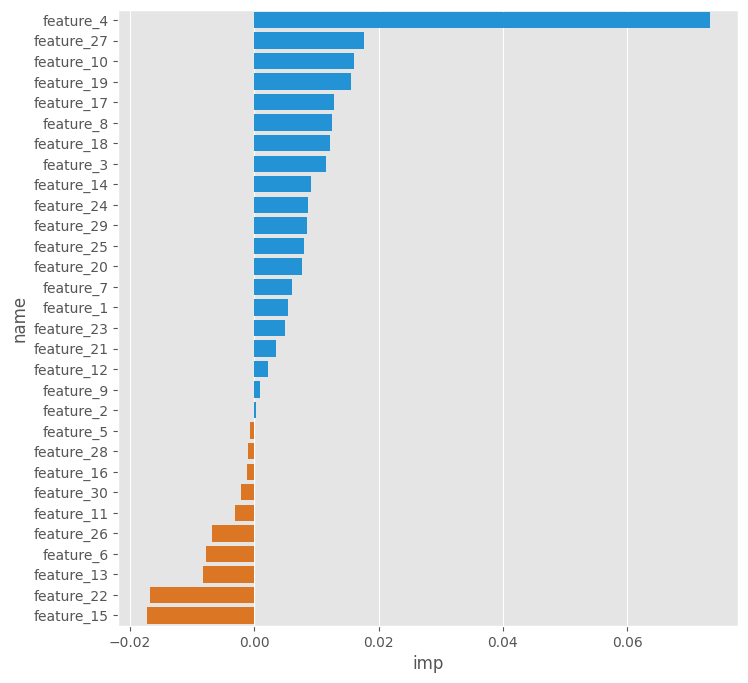

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

r = permutation_importance(model, x_test, y_test, n_repeats=100, random_state=42)

df = pd.DataFrame({"name": x_train.columns, "imp": r.importances_mean}).sort_values(
    "imp", ascending=False
)

df["colors"] = [
    sns.xkcd_rgb["orange"] if x < 0 else sns.xkcd_rgb["azure"] for x in df["imp"]
]


plt.figure(figsize=(8, 8))
sns.barplot(data=df, y="name", x="imp", palette=df.colors, orient="h")
plt.show()

In [ ]:

x_train_mod = x_train[x_train.columns[[0, 3, 5, 9, 29]]]
x_test_mod = x_test[x_test.columns[[0, 3, 5, 9, 29]]]

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_mod, y_train)
y_pred_rf = rf.predict(x_test_mod)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use 5 features (SFC), accuracy: {accuracy_rf:.2f}")

Use 5 features (SFC), accuracy: 0.55


In [ ]:
x_train_mod = x_train[x_train.columns[[3, 5, 21, 23, 28]]]
x_test_mod = x_test[x_test.columns[[3, 5, 21, 23, 28]]]

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_mod, y_train)
y_pred_rf = rf.predict(x_test_mod)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use 5 features (SFFC), accuracy: {accuracy_rf:.2f}")

Use 5 features (SFFC), accuracy: 0.61


In [ ]:
x_train_mod = x_train[x_train.columns[[3, 26, 9, 18, 16]]]
x_test_mod = x_test[x_test.columns[[3, 26, 9, 18, 16]]]

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_mod, y_train)
y_pred_rf = rf.predict(x_test_mod)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use 5 features (permutation_importance), accuracy: {accuracy_rf:.2f}")

Use 5 features (permutation_importance), accuracy: 0.63


# Задание 4. Бинарная классификация с LogisticRegression

В этом задании вам нужно решить задачу бинарной классификации. Используя только [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), добейтесь качества `accuracy` выше 0.91.

Что можно:
* Генерировать и отбирать признаки

Что нельзя:
* Менять модель

## Формат результата

* Accuracy модели > 0.91.


Импорт необходимых библиотек:

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [ ]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/feature_engineering_data.csv

In [ ]:
df = pd.read_csv("/content/feature_engineering_data.csv")
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,0.774059,140.294418,0.377009,4,0.233130,category_2,1
1,0.142857,168.224364,0.000856,23,0.427976,category_2,1
2,0.687500,165.427328,-1.353440,16,-0.996328,category_2,0
3,1.000000,188.878096,13.558928,4,0.332452,category_2,0
4,0.000000,183.025326,5.329313,4,-0.429498,category_1,1
...,...,...,...,...,...,...,...
1679,0.333333,212.082024,1.038087,29,0.427975,category_3,1
1680,0.000000,204.187500,-0.112248,19,-0.084355,category_1,1
1681,1.000000,159.500022,9.209267,19,0.045443,category_2,1
1682,0.454546,169.714358,2.718016,25,-0.507499,category_1,1


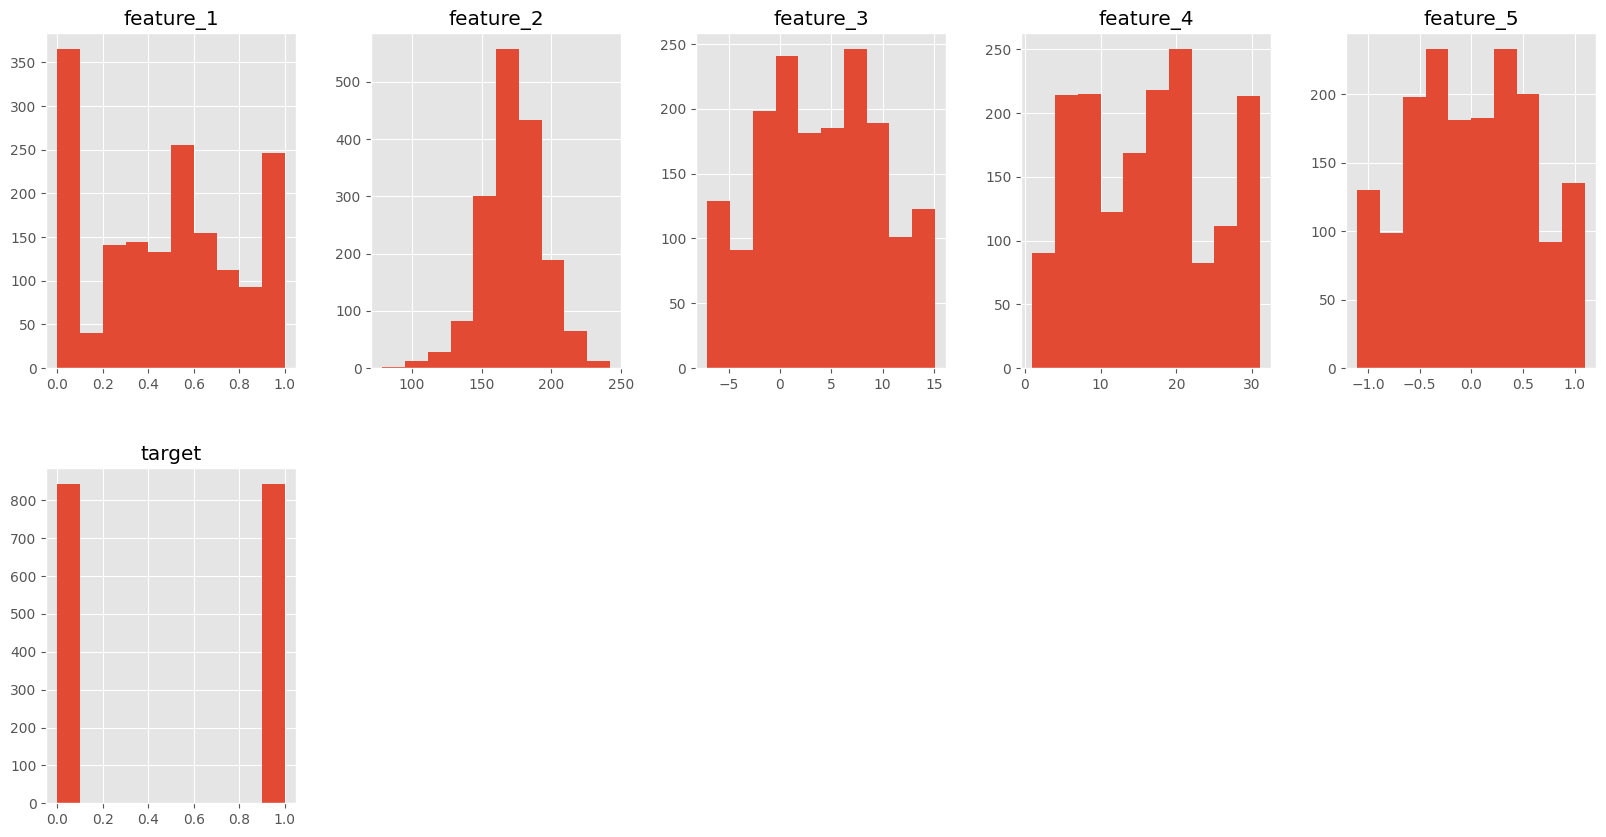

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(20, 10), layout=(-1, 5))
plt.show()

In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000
mean,0.471829,172.920751,4.004218,15.759501,0.000419,0.500000
std,0.334953,21.206629,5.613396,8.326364,0.562590,0.500149
min,0.000000,78.741718,-7.050906,1.000000,-1.100747,0.000000
25%,0.206534,159.986503,-0.380224,8.000000,-0.447078,0.000000
50%,0.500000,172.610735,4.019411,16.000000,0.001718,0.500000
75%,0.733333,186.216580,8.363235,21.000000,0.440627,1.000000
max,1.000000,242.000000,15.063375,31.000000,1.096193,1.000000


In [ ]:
df['feature_6'].unique()

array(['category_2', 'category_1', 'category_3'], dtype=object)

In [ ]:
df['feature_6'] = df['feature_6'].str.replace('category_', '')
df['feature_6']

0       2
1       2
2       2
3       2
4       1
       ..
1679    3
1680    1
1681    2
1682    1
1683    1
Name: feature_6, Length: 1684, dtype: object

In [ ]:
df['feature_6'] = df['feature_6'].astype(int)

In [ ]:
df.dtypes

feature_1    float64
feature_2    float64
feature_3    float64
feature_4      int64
feature_5    float64
feature_6      int64
target         int64
dtype: object

In [ ]:
df['target'].value_counts()

1    842
0    842
Name: target, dtype: int64

In [ ]:
x = df.drop(columns=["target"])
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

scaler = StandardScaler()

#  We then fit the scaling model to our training data.
x_train = scaler.fit_transform(x_train)

# We transform your test set by applying the same scaling model.
x_test = scaler.transform(x_test)

In [ ]:
# Your code here
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(x_test, y_test))

Accuracy of the model = 0.46


In [ ]:
from sklearn.feature_selection import SelectFromModel

# selecting features based on importance weights
lr_selector = SelectFromModel(LogisticRegression(max_iter=1000))
lr_selector.fit(x_train, y_train)
pd.DataFrame(x_train).columns[lr_selector.get_support()]  # Get a mask of the features selected

Int64Index([3, 5], dtype='int64')

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(pd.DataFrame(x_train)[pd.DataFrame(x_train).columns[[3, 5]]], y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(pd.DataFrame(x_test)[pd.DataFrame(x_test).columns[[3, 5]]], y_test))

Accuracy of the model = 0.47


In [ ]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(pd.DataFrame(x_train)[pd.DataFrame(x_train).columns[[0, 2, 3, 4, 5]]], y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model2.score((pd.DataFrame(x_test)[pd.DataFrame(x_test).columns[[0, 2, 3, 4, 5]]]), y_test))

Accuracy of the model = 0.47


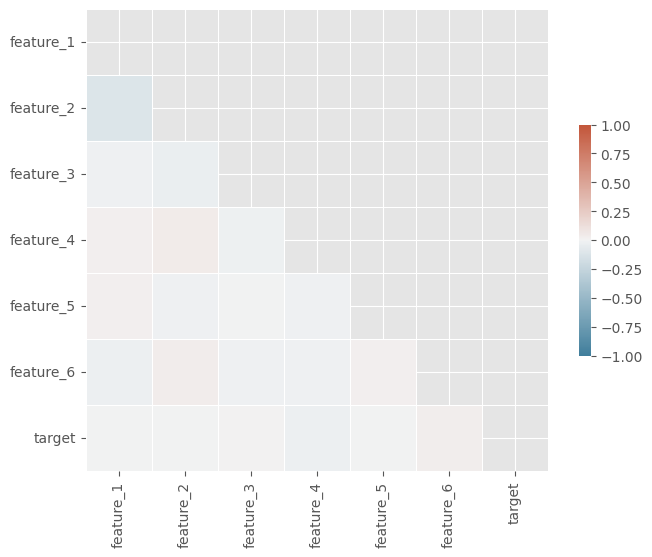

In [ ]:
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.show()

In [ ]:
# Your code here

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

x = df.drop(columns=["target"])
y = df["target"]

# split dataset into subsets for training ensemble and linear model and final testing of the linear model
x_full_train, x_test, y_full_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=42
)

# split training subset into parts for ensemble training and for linear model training
x_train_ensemble, x_train_linear, y_train_ensemble, y_train_linear = train_test_split(
    x_full_train, y_full_train, test_size=0.5, random_state=42
)

scaler = StandardScaler()

#  We then fit the scaling model to our training data.
x_train_linear = scaler.fit_transform(x_train_linear)
x_train_ensemble = scaler.fit_transform(x_train_ensemble)

# We transform your test set by applying the same scaling model.
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator, random_state=42)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)

grd.fit(x_train_ensemble, y_train_ensemble)
grd_enc.fit(grd.apply(x_train_ensemble)[:, :, 0])  # apply method return leaf indices
grd_lm.fit(grd_enc.transform(grd.apply(x_train_linear)[:, :, 0]), y_train_linear)


LogisticRegression(max_iter=1000)

In [ ]:
x_test1 = grd_enc.transform(grd.apply(x_test)[:, :, 0])

In [ ]:
y_pred_grd = grd_lm.predict(x_test1)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_grd)
print(f'Accuracy при добавлении в модель признаков, полученных на основе GB: {acc:.2f}')

Accuracy при добавлении в модель признаков, полученных на основе GB: 0.99
